In [3]:
import numpy as np
predictionArr = []
groudTruthArr = []
f= open("F:\\HS Weingarten Sem 2\\Embedded Project\\traffic-sign-recognition\\output.txt","r")
while True:
    # read line
    line = f.readline()
    # in python 2, print line
    # in python 3
    predictionArr.append(line)
    #print(line)
    # check if line is not empty
    if not line:
        break
f.close()
#print predictionArr[0]

f= open("F:\\HS Weingarten Sem 2\\Embedded Project\\traffic-sign-recognition\\groundTruth.txt","r")
while True:
    # read line
    line = f.readline()
    # in python 2, print line
    # in python 3
    groudTruthArr.append(line)
    #print(line)
    # check if line is not empty
    if not line:
        break
f.close()
#print groudTruthArr[0]

In [4]:
bbox = []
grtbox = []
predicted = []
groundTruth = []
#print len(predictionArr)
#print len(groudTruthArr)

for i in range(len(predictionArr)):
    data = predictionArr[i].split(";")
    image_id = data[0].split(".")
    data[0] = image_id[0]
    bbox.append(data)
    

for i in range(len(groudTruthArr)):
    data = groudTruthArr[i].split(";")
    image_id = data[0].split(".")
    data[0] = image_id[0]
    grtbox.append(data)
    
for i in range(len(bbox)):
    for j in range(1,len(bbox[i])):
        bbox[i][j] = int(bbox[i][j])
    predicted.append(bbox[i])
for i in range(len(grtbox)): 
    for j in range(1,len(grtbox[i])):
        grtbox[i][j] = int(grtbox[i][j]) 
    groundTruth.append(grtbox[i])

#gtbox xmin, ymin, xmax, ymax
#bbox ymin, ymax, xmin, xmax

In [5]:
def intersection(bbgt, bb):
    #print bbgt
    #print bb
    # determine the (x, y)-coordinates of the intersection rectangle
    ixmin = max(bbgt[1], bb[1])
    iymin = max(bbgt[2], bb[2])
    ixmax = min(bbgt[3], bb[3])
    iymax = min(bbgt[4], bb[4])
    
    # compute the area of intersection rectangle
    iw = max(ixmax - ixmin, 0)
    ih = max(iymax - iymin, 0)
    intersArea = iw * ih
    
    return intersArea

In [9]:
def union(bbgt, bb, intersArea):
    # compute the area of both the prediction and ground-truth rectangles
    boxgtArea = (bbgt[3] - bbgt[1]) * (bbgt[4] - bbgt[2])
    boxArea = (bb[3] - bb[1]) * (bb[4] - bb[2])
    unionArea = boxgtArea + boxArea - intersArea
    return unionArea


In [10]:
# Returns the intersection over union of two rectangles, a and b, where each is an array [x,y,w,h]
#def compute_iou(bbgt, bb,TP,result_mat):
    #overlaps = np.zeros(len(bbgt))
    #print bbgt
    #print bb
    #for i,gtBbox in enumerate(bbgt):
    """for i in range(len(bbgt)-1):
        if int(bbgt[i][0])==int(bb[0]):
            inters = float(intersection(bbgt[i], bb))
            uni = union(bbgt[i], bb, inters)
            iou = inters/uni
            if iou>0.7:
                result_mat[0] = int(bb[0])
                result_mat[1] = 1
                result_mat[2] = 0
                TP += 1
                break
            else:
                result_mat[0] = int(bb[0])
                result_mat[1] = 0
                result_mat[2] = 1
    #return ioumax, jmax
    #return ioumax,TP
#print ioumax
#print jmax

IndentationError: unexpected indent (<ipython-input-10-b1f92821a0e0>, line 7)

In [11]:
#TP = 0
#result_mat = np.empty((len(predicted)-1,3))
#result_mat = np.zeros((len(predicted)-1,3))
#for i in range(len(predicted)-1):
    #ioumax,TP = compute_iou(groundTruth,predicted[i],TP,result_mat[i])
#print TP
#print result_mat
#result_mat2 = np.copy(result_mat)
#result_mat2[~np.all(result_mat2 == 0, axis=0)]
#print result_mat

In [13]:
cumsumTP = np.cumsum(result_mat[:,1],axis=0)
#print cumsumTP
result_mat2 = np.column_stack((result_mat,cumsumTP))
cumsumFP = np.cumsum(result_mat[:,2],axis=0)
#print cumsumFP
final_mat = np.column_stack((result_mat2,cumsumFP))
#np.append(result_mat,cumsumTP,axis=1)
print (final_mat)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [15]:
prec = np.zeros((final_mat.shape[0],1))
recall = np.zeros((final_mat.shape[0],1))
for i in range(final_mat.shape[0]):
    cumTP = final_mat[i][3]
    cumFP = final_mat[i][4]
    prec[i] = cumTP/(cumTP+cumFP)
    recall[i] = cumTP/len(groundTruth)
#print prec.shape
#print recall.shape
prec_recall = np.column_stack((prec,recall))
prec_recall[np.argsort(prec_recall[:, 1])]
print (prec_recall[0])
final_matrix = np.column_stack((final_mat,prec_recall))

[nan  0.]


C:\Anaconda3\envs\CV\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [16]:
def plot_precision_recall_omkar(prec, recall):
    import matplotlib.pyplot as plt
    plt.plot(recall, prec)
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.show()

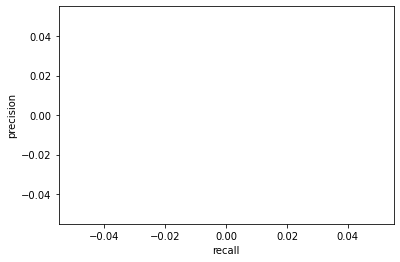

In [17]:
precision = np.zeros((len(prec_recall),1))
recall_final = np.zeros((len(prec_recall),1))
for i in range(len(prec_recall)):
    precision[i] = prec_recall[i][0]
    recall_final[i] = prec_recall[i][1]
#print recall_final
plot_precision_recall_omkar(precision,recall_final)

In [340]:
def plot_precision_recall(prec, recall):
    import matplotlib.pyplot as plt
    # first append sentinel values at the end
    mrec = np.concatenate((recall, [recall[-1]]))
    mpre = np.concatenate(([prec[0]], prec))
    # Plot Precision-Recall curve
    plt.clf()
    plt.plot(mrec, mpre, lw=2, color='navy',
             label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    #plt.title('Precision-Recall: AP={0:0.2f}'.format(ap))
    plt.legend(loc="lower left")
    plt.show()

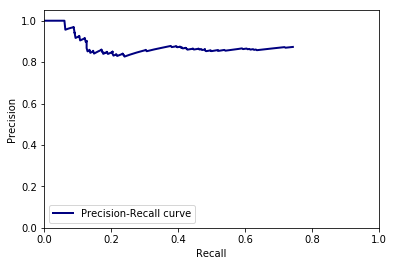

In [341]:
#ap = 0.93
plot_precision_recall(precision, recall_final)

In [18]:
def voc_ap(rec, prec, use_07_metric=False):
    """ ap = voc_ap(rec, prec, [use_07_metric])
    Compute VOC AP given precision and recall.
    If use_07_metric is true, uses the
    VOC 07 11 point method (default:False).
    """
    if use_07_metric:
        # 11 point metric
        # http://host.robots.ox.ac.uk/pascal/VOC/pubs/everingham10.pdf (page 313)
        
        ap = 0.
        for t in np.arange(0., 1.1, 0.1):
            if np.sum(rec >= t) == 0:
                p = 0
            else:
                p = np.max(prec[rec >= t])
            ap = ap + p / 11.
    else:
        # correct AP calculation (from VOC 2010 challenge)
        # http://host.robots.ox.ac.uk/pascal/VOC/voc2012/devkit_doc.pdf (page 12)
        
        # first append sentinel values at the end
        mrec = np.concatenate((rec))
        mpre = np.concatenate((prec))

        # compute the precision envelope
        for i in range(mpre.size - 1, 0, -1):
            mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

        # to calculate area under PR curve, look for points
        # where X axis (recall) changes value
        i = np.where(mrec[1:] != mrec[:-1])[0]

        # and sum (\Delta recall) * prec
        ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])
    return ap

In [343]:
voc_ap(recall_final,precision)

0.6596969976505913